<a href="https://colab.research.google.com/github/doetools/graphics_computing/blob/main/3d_obj_from_height_depth_maps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [160]:
from PIL import Image
import numpy as np

In [161]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount("/content/drive/")


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [162]:
fig_path = 'drive/My Drive/computer_graphics'

## Height Map
Many functions are referred in [Pillow.Image module](https://pillow.readthedocs.io/en/stable/reference/Image.html#PIL.Image.Image)

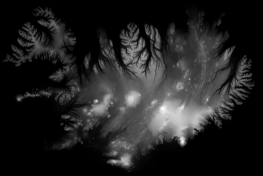

In [163]:
from numpy.ma.core import size
im = Image.open('drive/My Drive/computer_graphics/iceland_heightmap.png')
# get width and height
w, h = im.size
# get num of channels
c = im.getchannel
# reduce it by 10 times
im.reduce(10)

In [172]:
# convert the image into a numpy array
data = np.asarray(im)
print(data.shape)
np.allclose(data[:,:,0],data[:,:,1])

(1756, 2624, 4)


True

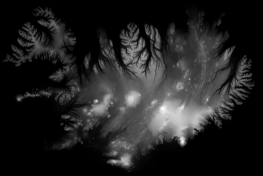

In [173]:
# reconstructing from numpy array
img_recon = Image.fromarray(data,"RGBA")
img_recon.reduce(10)

(100, 300, 4) uint8


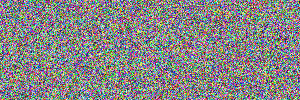

In [183]:
# generate a noise pic in rgba
# need int8 2^8 = 256
shape = (100,300,3)
data = np.random.rand(*shape)*255
data = data.astype(np.uint8)
# opaqueness: 0: opaque, 255: transparent
alpha = 240
alpha = np.ones((shape[0],shape[1], 1),dtype=np.uint8)*alpha
data = np.concatenate((data, alpha),axis=2)
print (data.shape,data.dtype)
img = Image.fromarray(data,"RGBA")
img.show()

## Deformation/Depth Map